In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\minji\AppData\Local\Temp/ipykernel_28528/410611610.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


### Gradient ascent in 2D

In [2]:
def peaks(x, y):
    # expand to a 2D mesh
    # take N-sized 1d-array to create N x N 2d-array (grid)
    x, y = np.meshgrid(x, y)
    
    z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
        - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
        - 1/3*np.exp(-(x+1)**2 - y**2)
    return z

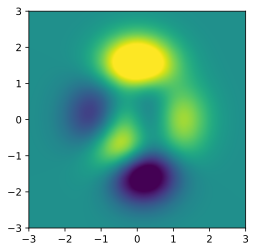

In [3]:
# create the landscape
x = np.linspace(-3, 3, 201)
y = np.linspace(-3, 3, 201)

Z = peaks(x, y) # grid of ordinates

plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.show()

In [4]:
sx, sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
    - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
    - 1/3*sym.exp(-(sx+1)**2 - sy**2)

# create functions from the sympy-computed derivatives (symbolic object)
df_x = sym.lambdify((sx, sy), sym.diff(sZ, sx), 'sympy')
df_y = sym.lambdify((sx, sy), sym.diff(sZ, sy), 'sympy')

df_x(1, 1).evalf()

-1.07369833656079

#1 Solution: GD 알고리즘 수식의 기호를 바꾼다.  
localmin = localmin + learning_rate*grad

In [5]:
# random starting point (uniform between -2 and +2)
localmax = np.random.rand(2)*4-2 # rand()는 0-1 사이 균일분포값 중 하나 반환
startpnt = localmax[:] # make a copy

learning_rate = .01
training_epochs = 1000

trajectory = np.zeros((training_epochs, 2)) # 각 column은 x, y값용
for i in range(training_epochs):
    grad = np.array([
        df_x(localmax[0], localmax[1]).evalf(),
        df_y(localmax[0], localmax[1]).evalf()
    ])
    localmax = localmax + learning_rate*grad # (,2)-sized vector
    trajectory[i,:] = localmax
    
print(localmax)
print(startpnt)

[1.28568469724130 -0.00484755907559365]
[1.36203634 0.38396695]


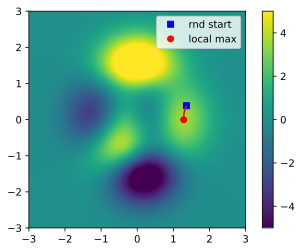

In [7]:
plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(startpnt[0], startpnt[1], 'bs')
plt.plot(localmax[0], localmax[1], 'ro')
plt.plot(trajectory[:,0], trajectory[:,1], 'r')
plt.legend(['rnd start', 'local max'])
plt.colorbar()
plt.show()

#2 Solution: 함수 결과값에 -1을 곱해 결과값의 부호를 바꾼다.

In [8]:
def peaks(x, y):
    # expand to a 2D mesh
    # take N-sized 1d-array to create N x N 2d-array (grid)
    x, y = np.meshgrid(x, y)
    
    z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
        - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
        - 1/3*np.exp(-(x+1)**2 - y**2)
    return -1*z

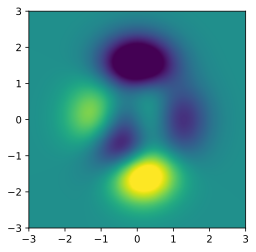

In [9]:
# create the landscape
x = np.linspace(-3, 3, 201)
y = np.linspace(-3, 3, 201)

Z = peaks(x, y) # grid of ordinates

plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.show()

In [10]:
sx, sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
    - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
    - 1/3*sym.exp(-(sx+1)**2 - sy**2)

# create functions from the sympy-computed derivatives (symbolic object)
df_x = sym.lambdify((sx, sy), sym.diff(-sZ, sx), 'sympy')
df_y = sym.lambdify((sx, sy), sym.diff(-sZ, sy), 'sympy')

df_x(1, 1).evalf()

1.07369833656079

In [11]:
# random starting point (uniform between -2 and +2)
localmax = np.random.rand(2)*4-2 # rand()는 0-1 사이 균일분포값 중 하나 반환
startpnt = localmax[:] # make a copy

learning_rate = .01
training_epochs = 1000

trajectory = np.zeros((training_epochs, 2)) # 각 column은 x, y값용
for i in range(training_epochs):
    grad = np.array([
        df_x(localmax[0], localmax[1]).evalf(),
        df_y(localmax[0], localmax[1]).evalf()
    ])
    localmax = localmax + learning_rate*grad # (,2)-sized vector
    trajectory[i,:] = localmax
    
print(localmax)
print(startpnt)

[0.228278920556369 -1.62553495750000]
[ 0.8703359  -0.56263459]


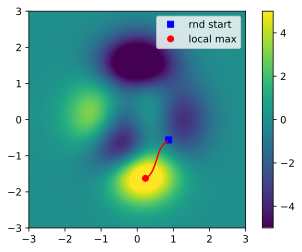

In [12]:
plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(startpnt[0], startpnt[1], 'bs')
plt.plot(localmax[0], localmax[1], 'ro')
plt.plot(trajectory[:,0], trajectory[:,1], 'r')
plt.legend(['rnd start', 'local max'])
plt.colorbar()
plt.show()